# Import packages

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math
from statsmodels.stats import weightstats as stests


# Module 1: Hypothesis Testing

A statistical <b>hypothesis</b> is an assumption about a population parameter. This assumption may or may not be true.

<b>Hypothesis testing</b> refers to the formal procedures used by statisticians to accept or reject such statistical hypotheses.

Suppose we want to determine whether a coin is fair, we need to define both null and alternate hypothesis:
1. <b>Null hypothesis, Ho</b>: half the flips would result in Heads and half, in Tails
2. <b>Alternative hypothesis, Ha</b>: the number of Heads and Tails would be very different

<mark>Example: Testing for whether the atmospheric temperature affects the speed at which ceiling fan is used.</mark>


## 1.1 Confidence level and Significance level
Once you have the null and alternative hypothesis in hand, you choose a <b>confidence level</b> and a <b>significance level</b>. 

1. The <b>confidence level</b> describes the uncertainty associated with a sampling method.
 - Suppose we used the same sampling method to select different samples and to compute a different interval estimate for each sample.
 - Some interval estimates would include the true population parameter and some would not. 
 - A 90% confidence level means that we would expect 90% of the interval estimates to include the population parameter;
 - A 95% confidence level means that 95% of the intervals would include the parameter; and so on
    
    
2. The <b>significance level</b> is a probability threshold that determines when you reject the null hypothesis. The confidence level is equivalent to 1 – the significance level


3. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the <b>p-value</b>.

<b>Summarizing- </b> 
1. If the <b>P value is less than significance level</b>, the hypothesis test is <b>statistically significant.</b>
2. If the <b>P value is more than significance level</b>, the hypothesis test is <b>not statistically significant.</b>

Various statistical tests are carried out to validate the hypothesis, either to prove or disprove it, based on the above concepts.

## 1.2 One-tailed and Two-tailed tests

Once the significance and cofidence levels are decided, we have to see whether the test will be <b>one-tailed or two-tailed</b>.

<b>One-Tailed</b><br/>
Test where the region of rejection is on only one side of the sampling distribution.

Example:
- Null hypothesis: mean is less than or equal to 10
- Alternative hypothesis would be that the mean is greater than 10

<b>Two-Tailed</b><br/>
Test where the region of rejection is on both sides of the sampling distribution.

Example:
- Null Hypothesis: mean is equal to 10
- Alternative hypothesis would be that the mean is less than 10 or greater than 10


## 2. Hypothesis tests

The parametric test is one in which we have information about the population parameter. i.e. we know or we can safely assume what distribution the population follows. Hence, we make use of the ditributions to calculate p-value.

On the other hand, the nonparametric test is one where we have no idea regarding the population parameter. i.e. we don't know and cannot assume a distribution for the population.

The following tests will be discussed in detail in the upcoming section- 
1. t-test <br>
1.1. Shapiro-Wilk Test <br>
1.2. Levene's Test <br> 
2. Z-test <br>   
3. Chi-Square Test <br>
4. Mann-Whitney U Test <br>


<b> Before we jump into the various hypothesis tests, we should know that non-parametric tests could be categorized into three different categories as shown below: </b>

<b> Goodness of Fit Tests : </b>In this categories, the distribution of the variable being analyzed is the same as hypothetical. <br>
<b> Tests for Independence: </b> Here, the claim is that the rows and columns of variables being tested are independent. <br>
<b> Tests for Homogeneity: </b> In tests for homogeneity, the variables being analyzed are distributed equally <br>

Given below is chart depicting common Non-Parametric Tests bases on the categories discussed above:
<p> <p>
<div style="width: 80%; display: inline-block; text-align: left;">
        <img src="./images/nonparametrics_list.jpg" alt="course_audience" height="400" width="400">
</div>


### 2.1 t test

<b>The t-test is a statistical test used to determine whether a numeric data sample differs significantly from the population or whether two samples differ from one another.</b>

<b> The t-test being a parametric test, makes the following assumptions: </b> 

1. The first assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale.
2. The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
3. The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve. When a normal distribution is assumed, one can specify a level of probability (alpha level, level of significance, p) as a criterion for acceptance. In most cases, a 5% value can be assumed.
4. The fourth assumption is a reasonably large sample size is used. A larger sample size means the distribution of results should approach a normal bell-shaped curve.
5. The final assumption is homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

<b> To check for assumptions of (point 3) normaility and (point 5) homogenity of variance we use the Sahpiro Wilks test, and Levene's test respectively. The usage of the shapiro wilks test can be seen in the examples provided below: </b>

### One-Sample t-test

<b>A one-sample t-test checks whether a sample mean differs from the population mean.</b> 

<mark>Let's create some synthetic age data for the population of voters in the entire country and a sample of voters in Singapore and test the whether the average age of voters in Singapore differs from the population.</mark>

Lets set the significance level at 5% for this test.<br/> Also, as we only want to know whether the average age of sample differs from the population, and it could be higher or lower, it is a two-tailed test.


<b>Create Data for performing t-test</b>

In [23]:
# Create synthetic data
np.random.seed(6)

#population data
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

#sample (bangalore) data
sgpore_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
sgpore_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
sgpore_ages = np.concatenate((sgpore_ages1, sgpore_ages2))

# Calculate population and sample means
print( 'Mean age of country (population):', population_ages.mean())
print( 'Mean age in Singapore (sample):',sgpore_ages.mean() )

Mean age of country (population): 43.000112
Mean age in Singapore (sample): 39.26


<b>We used a combination of slightly different distributions to generate the sample data for Singapore, so we know that the two means are different.</b>

Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population.


<b> Before we go ahead let's check if the data satisfies the assumption of normality</b>

### 2.1.1. Shapiro Wilks Test


<b> The Shapiro-Wilk test is a goodness of fit test that evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The null-hypothesis of this test is that the population is normally distributed. Thus, if the <b> p value is less than the chosen alpha level, then the null hypothesis is rejected </b> and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population)

#### Lets use the population sample generated for Singapore in t-test to apply z-test 

In [24]:
# normality test
stats.shapiro(sgpore_ages)

ShapiroResult(statistic=0.9531025886535645, pvalue=0.04581432789564133)

<b> Since the p-value is lower than our significance level α at 5% or confidence interval at 95% (equal to 1-conf. level or 0.05) so we should reject the null hypothesis. </b>

<b>On the other hand, since there is a 4.581% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level</b>.

This means if we were to construct a 99% confidence interval, it would capture the noramal distribution of the data. In this case, the p-value of 0.045814 is greater than our significance level of 0.01 and we fail to reject the null hypothesis

<b> Now let's check if the data satisfies the assumption of homogenity in variance for the two samples, which brings us to Levene's test </b>

### 2.1.2. Levene's Test

<b>Levene’s Test is a test of homogenity used to determine whether "two or more" groups have equal variances. It is commonly used because many statistical tests make the assumption that groups have equal variances and Levene’s Test allows you to determine if this assumption is satisified.</b>

#### As mentioned in the documentation for Levene's test, there are actually three different variations of Levene’s test you can use. The recommended usages are as follows:

‘median’: recommended for skewed distributions. <br>
‘mean’: recommended for symmetric, moderate-tailed distributions.<br>
‘trimmed’: recommended for heavy-tailed distributions.<br>

#### The following code illustrates how to perform Levene’s test using both the mean and the median as the center:

In [25]:
#Levene's test centered at the median
stats.levene(sgpore_ages1, sgpore_ages2, center='median')


LeveneResult(statistic=3.045464755235517, pvalue=0.0873624577950139)

In [26]:
#Levene's test centered at the mean
stats.levene(sgpore_ages1, sgpore_ages2, center='mean')


LeveneResult(statistic=3.1722485090511503, pvalue=0.08122762405113125)

#### In both methods, the p-value is not less than .05. 

This means in both cases we would fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the variance in population ages between the samples in Singapore is significantly different.

### Now, we can go ahead and perform t-test

In [27]:
# Perform t test
stats.ttest_1samp(a= sgpore_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

Since the p-value is lower than our significance level α (equal to 1-conf. level or 0.05) so we should reject the null hypothesis.
If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43.

<b>On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level</b>.

This means if we were to construct a 99% confidence interval, it would capture the population mean of 43. In this case, the p-value of 0.013 is greater than our significance level of 0.01 and we fail to reject the null hypothesis

### Two-Sample t-test

<b>A two-sample t-test investigates whether the means of two independent data samples differ from one another.</b>

1. In a two-sample test, the null hypothesis is that the means of both groups are the same
2. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means

<mark>Let's generate a sample of voter age data for Mumbai and test it against the sample we made earlier for Singaore</mark>

<b>Generate data for two sample t-test</b>

In [28]:
# Generate synthetic data

np.random.seed(12)
mumbai_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
mumbai_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
mumbai_ages = np.concatenate((mumbai_ages1, mumbai_ages2))

# Calculate mean of the sample
print('Mean age in Mumbai:', mumbai_ages.mean() )

Mean age in Mumbai: 42.8


 <b> Check for assumptions of normality and homogenity in variance </b> 

In [29]:
# normality test
shapiro(mumbai_ages)

ShapiroResult(statistic=0.9391676783561707, pvalue=0.01249064039438963)

<b>A p-value of 0.01249 means we'd expect to see data as extreme as our sample due to chance about 1.249% of the time if the null hypothesis was true</b>.


This means if we were to construct a 95% confidence interval, it wouldn't capture the normal distribution of the data and we reject the null hypothesis

If we were to construct a 99% confidence interval, it would capture the noramal distribution of the data. In this case, the p-value of 0.01249 is greater than our significance level of 0.01 and we fail to reject the null hypothesis

 <b> Now, let's test for homogenity in variance for Mumbai and Singapore populations </b>

In [30]:
stats.levene(sgpore_ages, mumbai_ages)

LeveneResult(statistic=0.028047686012903684, pvalue=0.8673418686154897)

#### The p-value is not less than .05 and significantly high at 0.867341868 

This means we would fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the variance in population ages between the cities is significantly different.

### Perform 2 sample t-test</b>

In [31]:
# Perform 2 sample t-test
stats.ttest_ind(a= sgpore_ages,
                b= mumbai_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

<b>The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical.
    
If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%. </b>

### 2.2. Z Test:

Z-test is a statistical method to determine whether the distribution of the test statistics can be approximated by a normal distribution. It is the method to determine whether two sample means are approximately the same or different when their variance is known and the sample size is large (should be >= 30).

### When to Use Z-test:

1. The sample size should be greater than 30. Otherwise, we should use the t-test. <br>
2. Samples should be drawn at random from the population. <br>
3. The standard deviation of the population should be known. <br>
4. Samples that are drawn from the population should be independent of each other. <br>
5. The data should be normally distributed, however for large sample size, it is assumed to have a normal distribution. <br>

#### One Sample Z-test

In one sample z-test ,we are checking one  data group and deciding whether sample mean is equal to population mean or not.

#### Lets use the sample generated in t-test to apply z-test 

In [32]:
# Perform Z-test
stests.ztest(x1 = sgpore_ages,               # Sample data
             value = population_ages.mean())  # Pop mean

(-2.5742714883655027, 0.010045141704952422)

<b>A p-value of 0.010045 means we'd expect to see data as extreme as our sample due to chance about 1.005% of the time if the null hypothesis was true</b>.

In this case, the p-value is lower than our significance level α (equal to 1-conf. level or 0.05) so we should reject the null hypothesis.
If we were to construct a 95% confidence interval for the sample it would not capture population mean of 43.

This means if we were to construct a 99% confidence interval, it would capture the population mean of 43. In this case, the p-value of 0.010045 is greater than our significance level of 0.01 and we fail to reject the null hypothesis

#### Two Sample Z-test

In two sample z-test ,we are checking one data group and deciding whether sample mean is equal to population mean or not.

#### Lets use the sample generated in t-test to apply two sample z-test 

In [22]:
# Perform 2 sample t-test
stests.ztest(x1 = sgpore_ages,
             x2 = mumbai_ages)

(-1.7083870793286842, 0.08756454310443189)

<b>If we were using a 95% confidence level we would fail to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 5%. </b>

Lets move on to similar analysis for categorical variables- <b>the chi-square test.</b>

## 2.3 Chi Square test

Chi square test can be used to test 2 scenarios-
1. <b>Goodness of fit</b>
2. <b>Independence</b>
 

We will get into the details of each in the upcoming sections.

#### Chi-Squared Goodness-Of-Fit Test

In our study of t-tests, we introduced the one-way t-test to check whether a sample mean differs from the an expected (population) mean. 
1. <b>The chi-squared goodness-of-fit test</b> is an analog of the one-way t-test for categorical variables: <b>it tests whether the distribution of sample categorical data matches an expected distribution.</b><br/><mark> Example: Variation of sales by customer gender</mark>


2. When working with categorical data, the values themselves aren't of much use for statistical testing because categories like "male", "female," and "other" have no mathematical meaning. <b>Tests dealing with categorical variables are based on variable counts instead of the actual value of the variables themselves.</b>

<b>Let's generate some synthetic demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different.</b>


<b>Create data for chi-square goodness of fit test</b>

In [5]:
# Create categorical data
#US
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

#minnesota
minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

# Print the frequency of occurance of each category
print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600



<b>Let's calculate the chi-squared statistic for our data to illustrate:</b>

In [6]:
# Calculate chi-square statistic 

observed = minnesota_table

# Get population ratios
national_ratios = national_table/len(national)  

# Get expected counts
expected = national_ratios * len(minnesota)   

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


<b>In the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution.</b>

Lets find the critical value and the p-value for the chi-square statistic at a 95% confidence level.

<b>P value calculation for the chi-square statistic</b>

In [7]:
# Calculate the p-value for the chi-square statistic

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value:",crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value:",p_value[0])

Critical value: 9.487729036781154
P value: 0.001130467092803511


<b>Since the chi-squared statistic of 18.9 exceeds the critical value of 9.48, the probability of demographic data of US being similar to Minessota is 0.11%.
    
Hence we'd reject the null hypothesis that the two distributions are the same.</b>

#### Chi Square test of independence

The chi-squared test of independence tests whether two categorical variables are independent.

The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion. <br/><mark>Example: We would want to know whether the sales by gender are also affected by the age group of the customer</mark>

<b>Let's generate some synthetic voter polling data and perform a test of independence:</b>

In [8]:
# Generate synthetic data

np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

observed = voter_tab.iloc[0:5,0:3]   # Get table without totals for later use

voter_tab

,democrat,independent,republican,row_totals
asian,21,7,32,60
black,65,25,64,154
hispanic,107,50,94,251
other,15,8,15,38
white,189,96,212,497
col_totals,397,186,417,1000


For a test of independence, we use the same chi-squared formula that we used for the goodness-of-fit test.

The main difference is we have to calculate the expected counts of each cell in a 2-dimensional table instead of a 1-dimensional table. To get the expected count for a cell, multiply the row total for that cell by the column total for that cell and then divide by the total number of observations.

<b>Expected count calculation</b>

In [9]:
# Calculate expected counts for each race 

expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000

expected = pd.DataFrame(expected)

expected.columns = ["democrat","independent","republican"]
expected.index = ["asian","black","hispanic","other","white"]

expected

,democrat,independent,republican
asian,23.820,11.160,25.020
black,61.138,28.644,64.218
hispanic,99.647,46.686,104.667
other,15.086,7.068,15.846
white,197.309,92.442,207.249


Now we can follow the same steps we took before to calculate the chi-square statistic, the critical value and the p-value.

<b>Perform Chi-Square test </b>

In [10]:
# Calculate the chi square statistic
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

7.169321280162059


Note: We call .sum() twice: once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.

<b>Calculate the p value</b>

In [11]:
# Calculate critical value and p value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value:",crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("p-value:",p_value)

Critical value: 15.50731305586545
p-value: 0.518479392948842


<b>As expected, given the high p-value of 0.51 i.e. the probability of expecting no relation between the race and voting results is 51%, we accept the null hypothesis of no relation between the 2 variables.</b>

### 2.4. Mann Whitney U Test


<b> The Mann-Whitney U test is a nonparametric statistical significance test for determining whether "two" independent samples were drawn from a population with the same distribution, thus checking if they have the same variance </b>

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. 

1. Rejection of this hypothesis suggests that there is likely some difference between the samples. 
2. The test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution.
3. If violated, it suggests differing distributions.

Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

## We will the used data in the three groups given below to test for Mann Whitney U Test

In [38]:
from scipy.stats import mannwhitneyu

group1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
group2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
group3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]


print("Testing for Group 1 and Group 2", mannwhitneyu(group1, group2))
print("Testing for Group 2 and Group 3", mannwhitneyu(group2, group3))
print("Testing for Group 1 and Group 3", mannwhitneyu(group1, group3))

Testing for Group 1 and Group 2 MannwhitneyuResult(statistic=32.0, pvalue=0.09144334643513091)
Testing for Group 2 and Group 3 MannwhitneyuResult(statistic=18.0, pvalue=0.00815204647024312)
Testing for Group 1 and Group 3 MannwhitneyuResult(statistic=34.0, pvalue=0.11825262327988856)


##### In all the cases, the p-value is not less than .05. 

This means in both cases we would fail to reject the null hypothesis. This means we do not have sufficient evidence to say that the variance in plant growth between the three fertilizers is significantly different.

##  Types of errors in Hypothesis testing

Two types of errors can result from a hypothesis test. 
1. <b>Type I error </b>- A Type I error occurs when the researcher rejects a null hypothesis when it is true. The probability of committing a Type I error is called the significance level
2. <b>Type II error</b> - A Type II error occurs when the researcher fails to reject a null hypothesis that is false. The probability of committing a Type II error is called Beta, and is often denoted by β. 


<p> <p>
<div style="width: 80%; display: inline-block; text-align: left;">
        <img src="./images/type-i-and-ii-error.png" alt="course_audience" height="300" width="400">
</div>

# Appendix

# Probability and Probability Distributions

## 1.1 Definitions
<b>Probability </b>
1. Probability is the measure of the likelihood that an event will occur
2. It quantifies as a number between 0 and 1, where, 0 indicates impossibility and 1 indicates certainty

<mark>E.g.: The probability of a customer churning in the next month is 12%</mark>
    

In [1]:
import os
os.chdir(r'C:\Users\Theja Pavan\Documents\RiSE Singapore\03 Content\Stats Basics')

<b>Experiments</b>
1. An experiment or trial is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes
2. A random experiment that has exactly two (mutually exclusive) possible outcomes is known as a Bernoulli trial

<mark>E.g. The government conducting a survey to capture Happiness index of its citizens</mark>


## 1.2 Probability distributions

A probability distribution is a function that describes all the possible values and likelihoods that a random variable can take within a given range.

Suppose you flip a coin 3 times
- Possible outcomes: HHH, HHT, HTH, HTT, THH, THT, TTH, and TTT
- Let X represent the # of Heads

Then, the probability of getting Heads
- 0 times is 1/8 (TTT)
- 1 time is 3/8 (HTT, THT, TTH)
- 2 times is 3/8 (HHT, HTH, THH)
- 3 times is 1/8 (HHH)


In the above scenario, if we look at X as getting upto X # of heads, then it becomes a <b>Cumulative probability distribution</b>

Then, the probability of getting Heads
- upto 0 times is 1/8 (0: TTT)
- upto 1 time is 4/8  (0: TTT; 1: HTT, THT, TTH)
- upto 2 times is 7/8 (0: TTT; 1: HTT, THT, TTH; 2: HHT, HTH, THH)
- upto 3 times is 8/8 (0: TTT; 1: HTT, THT, TTH; 2: HHT, HTH, THH; 3: HHH)

Plotting the above data gives the <b>Cumulative probability distribution</b> of X.

<p> <p>
<div style="width: 80%; display: inline-block; text-align: left;">
        <img src="./images/binomial_cdf.png" alt="course_audience" height="400" width="400">
</div>

<b>A probability distribution is characterised by the equation used to describe the probability as shown in above case.</b>

There exist various types of such functions used to describe different phenomenons.

These functions (Probability distributions) can be divided into two types-
1. <b>Discrete Probability</b> distributions
2. <b>Continuous Probability</b> distributions


<b>We will now look at examples each from Discrete and Continuous probability distributions</b>

### 1.2.1 Discrete probability distributions

#### Binomial distribution

<b>It summarizes the likelihood that a value will take one of two independent values under a given set of parameters or assumptions.</b>

The underlying assumptions of the binomial distribution are
- There is only one outcome for each trial
- Each trial has the same probability of success, and
- Each trial is mutually exclusive, or independent of each other.

<mark> Example -The machine undergoing a breakdown after manufacturing each batch follows a binomial distribution given other factors are held constant. Here the outcome is binary i.e. either breakdown or no breakdown </mark>


<p> <p>
<div style="width: 80%; display: inline-block; text-align: left;">
        <img src="./images/binomial_dist_ref.jpg" alt="course_audience" height="400" width="400">
</div>

The figure shows that when probaility of breakdown = 0.5, the distribution is symmetric about its expected value of 5 (number of trials = 10 * [0.5] = 5), where the probabilities of X being below the mean match the probabilities of X being the same distance above the mean.

Thus with iterations/trials (n) = 10 and probaility of breakdown (p) = 0.5:

    P(X = 4) = 0.2051 and P(X = 6) = 0.2051
    P(X = 3) = 0.1172 and P(X = 7) = 0.1172

<b>Generating a Binomial ditribution</b>

#### Poisson Distribution

<b>Poisson random variable is typically used to model the number of times an event happens in a time interval.</b>

<mark>Example:Number of users visiting a page in your website in an interval can be thought of as a Poisson process.</mark>

<p> <p>
<div style="width: 80%; display: inline-block; text-align: left;">
        <img src="./images/poisson dist.png" alt="course_audience" height="400" width="400">
</div>

In the example depicted in the graph above, let us assume that some probability of a user visiting a page is 3%. If we further a total of 100 users visited the website; the Poisson distribution describes the likelihood of getting a certain number of visiting a web-page in the website over some period of time, such as a single day.

### 1.2.2 Continuous probability distributions

#### Uniform distribution

The continuous uniform distribution or rectangular distribution is a family of symmetric probability distributions such that for each member of the family, all intervals of the same length on the distribution's support are equally probable.

<mark>Example: The average daily sale volume of soap remains fairly constant throughut the year.</mark>

<b> Generarting a Uniform distribution</b>

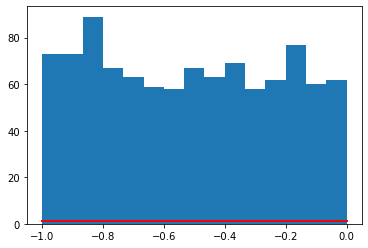

In [5]:
import matplotlib.pyplot as plt

s = np.random.uniform(-1,0,1000)

count, bins, ignored = plt.hist(s, 15)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

#### Normal distribution

The normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.

<mark>Stock market fluctuations, students' weights, yearly temperature averages, etc. all approximately follow the normal distribution.</mark>


The normal distribution model is motivated by the <b>Central Limit Theorem</b>.

<b>This theory states that averages calculated from independent, identically distributed random variables have approximately normal distributions, regardless of the type of distribution that the variables are sampled from.</b>

<b>Central Limit theorem</b>

Lets consider below array of random numbers

In [6]:
x = [66,21,33,59,8,77,96,82,60,42,99,11,78,72,73,59,95,22,24,34,63,70,85,29,91,25,45,9,48,9,69,26,12,94,49,47,5,21,38,12,97]

<b>Below is its distribution</b>

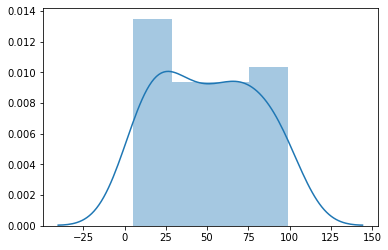

In [7]:
sns.distplot(x)

<b>Now, lets take multiple samples of size 3 and calculate their means</b>

In [8]:
y = []

for i in range(len(x)):
    for j in range(len(x)):
        for k in range(len(x)):
            y.append((x[i]+x[j]+x[k])/3)

The list y now contains means of 3 elements of a x taken at a time, with the process repeated for all such combinations.

<b>Lets plot a histogram of y</b>

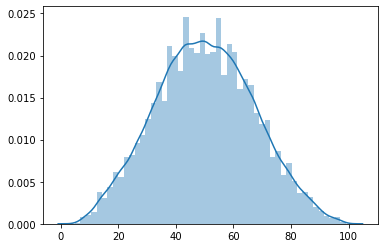

In [9]:
sns.distplot(y)

<b>As it can be seen, the distribution of sample means is approximately bell shaped.

This curve is known as a Normal distribution.</b>